In [ ]:
!pip install fancyimpute

In [2]:
import pandas as pd
from pandas import plotting
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import fancyimpute

## Load the training data

In [3]:
train = pd.read_csv("C:/Users/zenit/Desktop/Sahal backup/Northeastern University/Datasets/Loan Prediction/train_ctrUa4K.csv")

In [4]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Get shape of dataset

In [5]:
train.shape

(614, 13)

### Get different columns

In [6]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Get estimate of loan approval

In [7]:
train.Loan_Status.value_counts()/len(train.Loan_Status)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

## Check for any null values

In [8]:
train.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [9]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Observation: There are 7 columns with missing values

## Convert string values into numerical

In [10]:
train.Loan_Status = train.Loan_Status.map({'Y': 1, 'N': 0})
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [11]:
train.Self_Employed = train.Self_Employed.map({'Yes': 1, 'No': 0})
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,0.0,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,0.0,6000,0.0,141.0,360.0,1.0,Urban,1


In [12]:
train.Education = train.Education.map({'Graduate': 1, 'Not Graduate': 0})
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1


In [13]:
train.Married = train.Married.map({'Yes': 1, 'No': 0})
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1


In [14]:
train.Gender = train.Gender.map({'Male': 1, 'Female': 0})
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1


## Copy data do try different ways of Missing Value treatment

In [512]:
train1 = train

## Do Missing value treatment

In [15]:
train.Dependents.isnull().sum()

15

In [16]:
train.Dependents.fillna(method = 'ffill', limit = 1, inplace=True)

In [17]:
train.Property_Area.isnull().sum()

0

In [18]:
train.Property_Area.fillna(method = 'ffill', limit = 1, inplace = True)

In [30]:
## Treat null

train.Gender.fillna(method = 'ffill', limit = 1, inplace = True)

train.Married.fillna(method = 'ffill', limit = 1, inplace = True)

train.Self_Employed.fillna(method = 'ffill', limit =1, inplace = True)
train.Loan_Amount_Term.fillna(train.Loan_Amount_Term.mean(), inplace = True)
train.LoanAmount.fillna(train.LoanAmount.mean(), inplace = True)
train.Credit_History.fillna(method = 'ffill', limit = 1, inplace = True)

## Convert Dependents and Property area into numerical cateogrical variables

### "Dependents" Unique values: Before

In [524]:
train1.Dependents.unique()

array(['0', '1', '2', '3+', 'nan'], dtype=object)

In [525]:
train1['Dependents'] = np.where(train1['Dependents'] == '3+', '3', train1['Dependents'])

### "Dependents" Unique values: After

In [526]:
train.Dependents.unique()

array(['0', '1', '2', '3', 'nan'], dtype=object)

### Property Unique values: Before

In [532]:
train1.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [533]:
train1['Property_Area'] = np.where(train1['Property_Area'] == 'Urban', 1, np.where(train['Property_Area'] == 'Rural', 2, 3))

### Property Unique values: After

In [534]:
train1.Property_Area.unique()

array([1, 2, 3])

## Drop column and convert data type

In [535]:
train1.drop(['Loan_ID'], axis = 1, inplace = True)

train1['Dependents'] = train1['Dependents'].astype(float)
train1['Property_Area'] = train1['Property_Area'].astype(float)

In [538]:
train1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,1.0,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,2.0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1.0,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1.0,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1.0,1


In [539]:
train1.dtypes

Gender               float64
Married              float64
Dependents           float64
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status            int64
dtype: object

In [540]:
for feature in train1.columns:
    if np.any(np.isnan(train1[feature])):
        train1["is_" + feature + "_missing"] = np.isnan(train1[feature])*1

In [541]:
train1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,is_Gender_missing,is_Married_missing,is_Dependents_missing,is_Self_Employed_missing,is_LoanAmount_missing,is_Loan_Amount_Term_missing,is_Credit_History_missing
0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,1.0,1,0,0,0,0,1,0,0
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,2.0,0,0,0,0,0,0,0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1.0,1,0,0,0,0,0,0,0
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1.0,1,0,0,0,0,0,0,0
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1.0,1,0,0,0,0,0,0,0


# STEP:
## Missing Value: Drop all NAs

### Create a dataframe containing the indices of all the NA rows

In [547]:
train_na_indices = np.max(np.isnan(train1), axis=1)

### Create a final dataframe after removing all the rows with NAs

In [580]:
train1_remNA = train1[~train_na_indices]

In [581]:
train1_remNA.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,is_Gender_missing,is_Married_missing,is_Dependents_missing,is_Self_Employed_missing,is_LoanAmount_missing,is_Loan_Amount_Term_missing,is_Credit_History_missing
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,2.0,0,0,0,0,0,0,0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1.0,1,0,0,0,0,0,0,0
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1.0,1,0,0,0,0,0,0,0


In [582]:
train1_remNA.shape

(480, 19)

## Drop Binary columns

In [585]:
train1_remNA_bin = train1_remNA.iloc[:, :-6]

In [586]:
train1_remNA_bin.shape

(480, 13)

## STEP: Create one hot encoding for Dependent and Property_Area variable

In [20]:
dependents = pd.get_dummies(train.Dependents, prefix = 'Dependents')  #, drop_first = True
dependents.head()

,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,1,0,0,0
1,0,1,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [21]:
property_ar = pd.get_dummies(train.Property_Area, prefix = 'Property')  #, drop_first = True
property_ar.head()

,Property_Rural,Property_Semiurban,Property_Urban
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [22]:
train = train.join(dependents)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,146.412162,360.0,1.0,Urban,1,1,0,0,0
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,Rural,0,0,1,0,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,Urban,1,1,0,0,0
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,Urban,1,1,0,0,0
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,Urban,1,1,0,0,0


In [23]:
train = train.join(property_ar)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Rural,Property_Semiurban,Property_Urban
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,146.412162,360.0,1.0,Urban,1,1,0,0,0,0,0,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,Rural,0,0,1,0,0,1,0,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,Urban,1,1,0,0,0,0,0,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,Urban,1,1,0,0,0,0,0,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,Urban,1,1,0,0,0,0,0,1


In [24]:
train.dtypes

Loan_ID                object
Gender                float64
Married               float64
Dependents             object
Education               int64
Self_Employed         float64
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status             int64
Dependents_0            uint8
Dependents_1            uint8
Dependents_2            uint8
Dependents_3+           uint8
Property_Rural          uint8
Property_Semiurban      uint8
Property_Urban          uint8
dtype: object

## Find count of categorical variables across different columns

### Gender

In [363]:
train.Gender.value_counts()

1.0    489
0.0    112
Name: Gender, dtype: int64

In [364]:
train.Gender.isnull().sum()

13

In [365]:
train[train['Gender'].isnull() == True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Rural,Property_Semiurban,Property_Urban
23,LP001050,NaN,1.0,2,0,0.0,3365,1917.0,112.0,360.0,0.0,Rural,0,0,0,1,0,1,0,0
126,LP001448,NaN,1.0,3+,1,0.0,23803,0.0,370.0,360.0,1.0,Rural,1,0,0,0,1,1,0,0
171,LP001585,NaN,1.0,3+,1,0.0,51763,0.0,700.0,300.0,1.0,Urban,1,0,0,0,1,0,0,1
188,LP001644,NaN,1.0,0,1,1.0,674,5296.0,168.0,360.0,1.0,Rural,1,1,0,0,0,1,0,0
314,LP002024,NaN,1.0,0,1,0.0,2473,1843.0,159.0,360.0,1.0,Rural,0,1,0,0,0,1,0,0
334,LP002103,NaN,1.0,1,1,1.0,9833,1833.0,182.0,180.0,1.0,Urban,1,0,1,0,0,0,0,1
460,LP002478,NaN,1.0,0,1,1.0,2083,4083.0,160.0,360.0,NaN,Semiurban,1,1,0,0,0,0,1,0
467,LP002501,NaN,1.0,0,1,0.0,16692,0.0,110.0,360.0,1.0,Semiurban,1,1,0,0,0,0,1,0
477,LP002530,NaN,1.0,2,1,0.0,2873,1872.0,132.0,360.0,0.0,Semiurban,0,0,0,1,0,0,1,0
507,LP002625,NaN,0.0,0,1,0.0,3583,0.0,96.0,360.0,1.0,Urban,0,1,0,0,0,0,0,1


In [147]:
type(train)

pandas.core.frame.DataFrame

In [216]:
trainGender_tr = train[train['Gender'].isnull() ==False]

trainGender_tr_y = trainGender_tr['Gender']
trainGender_trX = trainGender_tr.drop(['Gender'], axis = 1)
trainGender_trX = trainGender_trX.drop(['Loan_ID'], axis = 1)

In [151]:
train.groupby(['Gender','Married', 'Education', 'Self_Employed', 'Property_Area']).count()

Loan_ID  Dependents  \
Gender Married Education    Self_Employed Property_Area                        
Female No      Graduate     No            Rural               13          13   
                                          Semiurban           21          21   
                                          Urban               19          17   
                            Yes           Rural                1           1   
                                          Semiurban            5           5   
                                          Urban                2           2   
               Not Graduate No            Rural                4           4   
                                          Semiurban            3           3   
                                          Urban                3           3   
                            Yes           Semiurban            2           2   
                                          Urban                1           1   
       Yes     Graduate     No            Rural                2           2   
                                          Semiurban           14          14   
                                          Urban                5           5   
                            Yes           Rural                1           1   
                                          Semiurban            1           1   
                                          Urban                1           1   
               Not Graduate No            Rural                1           1   
                                          Semiurban            3           3   
                            Yes           Rural                1           1   
Male   No      Graduate     No            Rural               27          27   
                                          Semiurban           28          27   
                                          Urban               26          25   
                            Yes           Rural                3           3   
                                          Semiurban            3           3   
                                          Urban                6           6   
               Not Graduate No            Rural               10          10   
                                          Semiurban            9           9   
                                          Urban                6           6   
                            Yes           Rural                1           1   
                                          Semiurban            2           2   
                                          Urban                1           1   
       Yes     Graduate     No            Rural               60          59   
                                          Semiurban           85          85   
                                          Urban               78          76   
                            Yes           Rural               15          15   
                                          Semiurban           14          13   
                                          Urban                9           9   
               Not Graduate No            Rural               23          22   
                                          Semiurban           22          20   
                                          Urban               26          26   
                            Yes           Rural                3           3   
                                          Semiurban            3           3   
                                          Urban                3           2   

                                                         ApplicantIncome  \
Gender Married Education    Self_Employed Property_Area                    
Female No      Graduate     No            Rural                       13   
                                          Semiurban                   21   
                                          Urban                       19

In [223]:
pd.crosstab(index = train['Gender'], columns = train['Loan_Status'], normalize = 'index')

Loan_Status,0,1
Gender,,
0.0,0.330357,0.669643
1.0,0.306748,0.693252


In [254]:
df = train.groupby(['Loan_Status','Married', 'Property_Area', 'Dependents', 'Education', 'Self_Employed'])['Gender'].agg(pd.Series.mode).to_frame()

In [259]:
df.head(20)

Gender
Loan_Status Married Property_Area Dependents Education Self_Employed            
0           0.0     Rural         0          0         0.0                     1
                                             1         0.0                     1
                                                       1.0                     0
                                  1          0         0.0                     0
                                             1         1.0                     1
                                  2          1         0.0                     1
                                  3+         1         0.0                     1
                    Semiurban     0          0         0.0                     1
                                             1         0.0                     1
                                                       1.0                     0
                                  1          0         1.0            [0.0, 1.0]
                                             1         0.0                     0
                    Urban         0          0         0.0                     1
                                             1         0.0                     1
                                                       1.0                     1
                                  1          0         1.0                     1
                                             1         0.0            [0.0, 1.0]
                                  2          1         0.0                     0
                                  3+         0         0.0                     0
            1.0     Rural         0          0         0.0                     1

In [462]:
train.Gender.value_counts()

1.0    500
0.0    114
Name: Gender, dtype: int64

In [262]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Rural,Property_Semiurban,Property_Urban
0,LP001002,None,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,1,1,0,0,0,0,0,1
1,LP001003,None,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0,0,1,0,0,1,0,0
2,LP001005,None,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1,1,0,0,0,0,0,1
3,LP001006,None,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1,1,0,0,0,0,0,1
4,LP001008,None,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1,1,0,0,0,0,0,1


### Married

In [317]:
train.Married.value_counts()

1.0    400
0.0    214
Name: Married, dtype: int64

In [318]:
train.Married.isnull().sum()

0

In [319]:
pd.crosstab(index = train['Married'], columns = train['Loan_Status'], normalize = 'index')

Loan_Status,0,1
Married,,
0.0,0.369159,0.630841
1.0,0.282500,0.717500


### Dependents

In [11]:
train.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [324]:
train.Dependents.isnull().sum()

15

In [325]:
pd.crosstab(index = train['Dependents'], columns = train['Loan_Status'])

Loan_Status,0,1
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


### Education

In [12]:
train.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [86]:
train.Education.isnull().sum()

0

In [116]:
pd.crosstab(index = train['Education'], columns = train['Loan_Status'], normalize = 'index')

Loan_Status,N,Y
Education,,
Graduate,0.291667,0.708333
Not Graduate,0.388060,0.611940


### Self Employed

In [25]:
train.Self_Employed.value_counts()

0.0    526
1.0     86
Name: Self_Employed, dtype: int64

In [31]:
train.Self_Employed.isnull().sum()

0

In [119]:
pd.crosstab(index = train['Self_Employed'], columns = train['Loan_Status'], normalize = 'index')

Loan_Status,N,Y
Self_Employed,,
No,0.314000,0.686000
Yes,0.317073,0.682927


### Credit history

In [26]:
train.Credit_History.value_counts()

1.0    509
0.0    100
Name: Credit_History, dtype: int64

In [88]:
train.Credit_History.isnull().sum()

50

In [122]:
pd.crosstab(index = train['Credit_History'], columns = train['Loan_Status'], normalize = 'index')

Loan_Status,N,Y
Credit_History,,
0.0,0.921348,0.078652
1.0,0.204211,0.795789


### Property area

In [15]:
train.Property_Area.value_counts()

#no null

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [125]:
pd.crosstab(index = train['Property_Area'], columns = train['Loan_Status'], normalize = 'index')

Loan_Status,N,Y
Property_Area,,
Rural,0.385475,0.614525
Semiurban,0.231760,0.768240
Urban,0.341584,0.658416


### Check count of Loan Status

In [401]:
train.Loan_Status.value_counts()

#no null

1    422
0    192
Name: Loan_Status, dtype: int64

# STEP: 
## Create a labels (Target) dataframe separately

In [32]:
y = train['Loan_Status']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

## Drop labels from predictor dataframe

In [33]:
X = train.drop(['Loan_Status'], axis = 1)
X.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Rural,Property_Semiurban,Property_Urban
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,146.412162,360.0,1.0,Urban,1,0,0,0,0,0,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,Rural,0,1,0,0,1,0,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,Urban,1,0,0,0,0,0,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,Urban,1,0,0,0,0,0,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,Urban,1,0,0,0,0,0,1


# STEP:
## MICE missing value treatment

In [597]:
mice = fancyimpute.MICE(verbose = 0)

NameError: name 'fancyimpute' is not defined

In [34]:
X.isnull().any()

Loan_ID               False
Gender                False
Married               False
Dependents            False
Education             False
Self_Employed         False
ApplicantIncome       False
CoapplicantIncome     False
LoanAmount            False
Loan_Amount_Term      False
Credit_History        False
Property_Area         False
Dependents_0          False
Dependents_1          False
Dependents_2          False
Dependents_3+         False
Property_Rural        False
Property_Semiurban    False
Property_Urban        False
dtype: bool

In [563]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'is_Gender_missing', 'is_Married_missing', 'is_Dependents_missing',
       'is_Self_Employed_missing', 'is_LoanAmount_missing',
       'is_Loan_Amount_Term_missing', 'is_Credit_History_missing',
       'Dependents_0.0', 'Dependents_1.0', 'Dependents_2.0', 'Dependents_3.0',
       'Property_1.0', 'Property_2.0', 'Property_3.0'],
      dtype='object')

## Drop irrelevant columns before model input

In [35]:
X.drop(['Dependents'], axis =1, inplace = True)
X.drop(['Property_Area'], axis =1, inplace = True)
X.drop(['Loan_ID'], axis =1, inplace = True)

X.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Rural,Property_Semiurban,Property_Urban
0,1.0,0.0,1,0.0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,1
1,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,1,0,0,1,0,0
2,1.0,1.0,1,1.0,3000,0.0,66.000000,360.0,1.0,1,0,0,0,0,0,1
3,1.0,1.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,1,0,0,0,0,0,1
4,1.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,1


## Drop extra columns

In [96]:
X.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Property_Rural', 'Property_Semiurban', 'Property_Urban'],
      dtype='object')

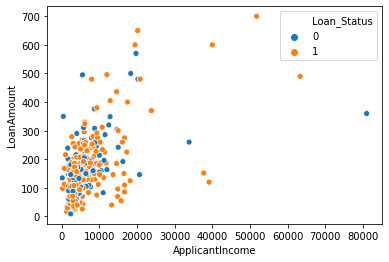

In [176]:
sns.scatterplot(x=train['ApplicantIncome'], y = train['LoanAmount'], hue = train['Loan_Status'])

In [136]:
Xx = X.loc[:, ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 
               'Loan_Amount_Term', 'Credit_History', 'Married']]

# STEP:
## Split data into Train and validation

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(Xx, y, test_size = 0.3)

## Logistic Regression Model

In [166]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 80000)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
accuracy = model.score(X_val, y_val)
accuracy

0.8594594594594595

In [121]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred)

0.8594594594594595

## Random Forest model

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [170]:
rf_clf = RandomForestClassifier(n_estimators = 1000, max_features = 0.25, criterion = 'entropy', class_weight = 'balanced')

In [171]:
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_val)
acuracy = rf_clf.score(X_val, y_val)
accuracy

0.8594594594594595

In [91]:
importances.shape

(16,)

([<matplotlib.axis.XTick at 0x21fd933fdd8>,
 <a list of 16 Text xticklabel objects>)

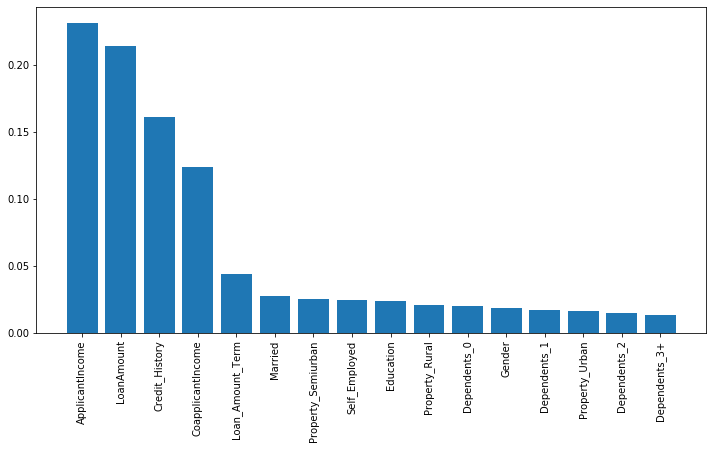

In [94]:
importances = rf_clf.feature_importances_
indices = np.argsort(rf_clf.feature_importances_)[::-1]
plt.figure(figsize=(12, 6))
plt.bar(range(1, 17), importances[indices], align="center")

plt.xticks(range(1, 17), X.columns[indices], rotation=90)

In [95]:
X.head(5)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Rural,Property_Semiurban,Property_Urban
0,1.0,0.0,1,0.0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,1
1,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,1,0,0,1,0,0
2,1.0,1.0,1,1.0,3000,0.0,66.000000,360.0,1.0,1,0,0,0,0,0,1
3,1.0,1.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,1,0,0,0,0,0,1
4,1.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,1


# RESULT:

## 1. On missing values imputation by Forward fill (Logistic): 81%
## 2. On removing rows with missing values completely (Logistic): 77%
## 3. On missing values imputation by Forward fill (Random Forest): 84%

In [411]:
from sklearn import metrics
cnf = metrics.confusion_matrix(y_val, y_pred)
cnf

array([[ 25,  26],
       [  8, 126]], dtype=int64)

In [81]:
test = pd.read_csv("C:/Users/zenit/Desktop/Sahal backup/Northeastern University/Datasets/Loan Prediction/test_lAUu6dG.csv")

In [50]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


## Do preprocessing of Test data

In [386]:
test.isnull().any()

Loan_ID              False
Gender                True
Married              False
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
dtype: bool

In [51]:
test.Gender.fillna(method = 'ffill', limit = 1, inplace = True)
test.Property_Area.fillna(method = 'ffill', limit = 1, inplace = True)
test.Dependents.fillna(method = 'ffill', limit = 1, inplace = True)
#test.Married.fillna(method = 'ffill', limit = 1, inplace = True)
test.Self_Employed.fillna(method = 'ffill', limit =1, inplace = True)
test.Loan_Amount_Term.fillna(train.Loan_Amount_Term.mean(), inplace = True)
test.LoanAmount.fillna(train.LoanAmount.mean(), inplace = True)
test.Credit_History.fillna(method = 'ffill', limit = 1, inplace = True)

In [52]:
test.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
dtype: bool

In [53]:
test.Self_Employed = test.Self_Employed.map({'Yes': 1, 'No': 0})
test.Education = test.Education.map({'Graduate': 1, 'Not Graduate': 0})
test.Married = test.Married.map({'Yes': 1, 'No': 0})
test.Gender = test.Gender.map({'Male': 1, 'Female': 0})

In [54]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,1,0,5720,0,110.0,360.0,1.0,Urban
1,LP001022,1,1,1,1,0,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,1,1,2,1,0,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,1,1,2,1,0,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,1,0,0,0,0,3276,0,78.0,360.0,1.0,Urban


In [55]:
dependents = pd.get_dummies(test['Dependents'], prefix = 'dependents')
property_ar = pd.get_dummies(test['Property_Area'], prefix = 'Property')

In [56]:
test = test.join(dependents)
test = test.join(property_ar)
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,dependents_0,dependents_1,dependents_2,dependents_3+,Property_Rural,Property_Semiurban,Property_Urban
0,LP001015,1,1,0,1,0,5720,0,110.0,360.0,1.0,Urban,1,0,0,0,0,0,1
1,LP001022,1,1,1,1,0,3076,1500,126.0,360.0,1.0,Urban,0,1,0,0,0,0,1
2,LP001031,1,1,2,1,0,5000,1800,208.0,360.0,1.0,Urban,0,0,1,0,0,0,1
3,LP001035,1,1,2,1,0,2340,2546,100.0,360.0,1.0,Urban,0,0,1,0,0,0,1
4,LP001051,1,0,0,0,0,3276,0,78.0,360.0,1.0,Urban,1,0,0,0,0,0,1


In [57]:
test1 = test
test1.drop(['Dependents', 'Property_Area', 'Loan_ID'], axis = 1, inplace = True)

In [58]:
test1.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,dependents_0,dependents_1,dependents_2,dependents_3+,Property_Rural,Property_Semiurban,Property_Urban
0,1,1,1,0,5720,0,110.0,360.0,1.0,1,0,0,0,0,0,1
1,1,1,1,0,3076,1500,126.0,360.0,1.0,0,1,0,0,0,0,1
2,1,1,1,0,5000,1800,208.0,360.0,1.0,0,0,1,0,0,0,1
3,1,1,1,0,2340,2546,100.0,360.0,1.0,0,0,1,0,0,0,1
4,1,0,0,0,3276,0,78.0,360.0,1.0,1,0,0,0,0,0,1


In [399]:
test1.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'dependents_0', 'dependents_1', 'dependents_2', 'dependents_3+',
       'Property_Rural', 'Property_Semiurban', 'Property_Urban'],
      dtype='object')

In [109]:
test1 = test1.loc[:, ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]

In [110]:
y_test_pred = model.predict(test1)
y_test_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [111]:
y_test_pred = rf_clf.predict(test1)
y_test_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,

In [61]:
type(y_test_pred)

numpy.ndarray

In [112]:
pred = pd.DataFrame(columns = ['Loan_ID', 'Loan_Status'])

pred['Loan_Status'] = y_test_pred

pred.head()

,Loan_ID,Loan_Status
0,NaN,1
1,NaN,1
2,NaN,1
3,NaN,1
4,NaN,1


In [113]:
#IDs = pd.DataFrame(test['Loan_ID'])

pred['Loan_ID'] = test['Loan_ID']

#prediction = IDs.join(pred)

pred.head()

prediction = pred
#prediction.head()

In [114]:
prediction.to_csv("C:/Users/zenit/Desktop/Sahal backup/Northeastern University/Datasets/Loan Prediction/predictions_rf_red.csv")

In [430]:
from sklearn.svm import SVC
svclassifier = SVC(kernel = 'linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_val)
y_pred.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [432]:
accuracy = svclassifier.score(X_val, y_val)
accuracy

0.8054054054054054